* ゾーンクラスタの作成

In [1]:
import pandas as pd
df=pd.read_csv("/home/2025/gawa/gawa_seq/workspace/statcast_data_pitch_categori.csv")

In [2]:
df["plate_x"]

0         -1.16
1         -1.17
2          0.48
3         -0.41
4         -0.19
           ... 
3345234   -0.39
3345235   -0.09
3345236    1.28
3345237    0.28
3345238   -0.21
Name: plate_x, Length: 3345239, dtype: float64

In [3]:
df["plate_z"]

0          3.06
1          2.75
2          2.07
3          1.85
4          2.41
           ... 
3345234    1.87
3345235    1.11
3345236    2.10
3345237    1.17
3345238    1.07
Name: plate_z, Length: 3345239, dtype: float64

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [7]:
print(df[['plate_x', 'plate_z']].isna().sum())


plate_x    75278
plate_z    75278
dtype: int64


In [17]:
# plate_x と plate_z だけ抽出して確認
selected_columns = df[['plate_x', 'plate_z']]

# 基本統計量の確認
stats = selected_columns.describe()

# 結果の表示
stats

,plate_x,plate_z
count,3.269961e+06,3.269961e+06
mean,4.345471e-02,2.283174e+00
std,8.414101e-01,9.736910e-01
min,-6.516000e+01,-4.511000e+01
25%,-5.200000e-01,1.650000e+00
50%,4.000000e-02,2.290000e+00
75%,6.100000e-01,2.930000e+00
max,1.020000e+01,1.358000e+01


In [16]:
print(stats)

         Unnamed: 0  release_speed  release_pos_x  release_pos_z  \
count  3.269961e+06   3.269959e+06   3.269751e+06   3.269751e+06   
mean   1.680028e+06   8.894122e+01  -7.997335e-01   5.802336e+00   
std    9.675395e+05   6.074637e+00   1.859617e+00   5.409688e-01   
min    0.000000e+00   3.010000e+01  -5.340000e+00  -1.300000e-01   
25%    8.366300e+05   8.460000e+01  -2.110000e+00   5.540000e+00   
50%    1.678952e+06   8.980000e+01  -1.490000e+00   5.840000e+00   
75%    2.512859e+06   9.380000e+01   9.500000e-01   6.140000e+00   
max    3.345238e+06   1.055000e+02   1.800000e+01   8.110000e+00   

             batter       pitcher          zone   hit_location         balls  \
count  3.269961e+06  3.269961e+06  3.269961e+06  730138.000000  3.269961e+06   
mean   6.190784e+05  6.169431e+05  9.083520e+00       5.091765  8.795450e-01   
std    6.116911e+04  6.193237e+04  4.228099e+00       2.630744  9.671619e-01   
min    4.053950e+05  4.053950e+05  1.000000e+00       1.000000  0.0

In [8]:
df = df.dropna(subset=['plate_x', 'plate_z'])


In [18]:
df_clean = df[(df['plate_x'].between(-5,5)) & (df['plate_z'].between(-2, 7))]

In [19]:
# plate_x と plate_z だけ抽出して確認
selected_columns_clean = df_clean[['plate_x', 'plate_z']]

# 基本統計量の確認
stats = selected_columns_clean.describe()

# 結果の表示
stats

,plate_x,plate_z
count,3.269534e+06,3.269534e+06
mean,4.339965e-02,2.283592e+00
std,8.402041e-01,9.717921e-01
min,-5.000000e+00,-2.000000e+00
25%,-5.200000e-01,1.650000e+00
50%,4.000000e-02,2.290000e+00
75%,6.100000e-01,2.930000e+00
max,4.920000e+00,7.000000e+00


In [21]:
# K-means クラスタリングの適用
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_clean[['plate_x', 'plate_z']])
df_clean['zone_cluster'] = kmeans.labels_

/tmp/ipykernel_1879378/162445828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['zone_cluster'] = kmeans.labels_


/home/2025/gawa/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


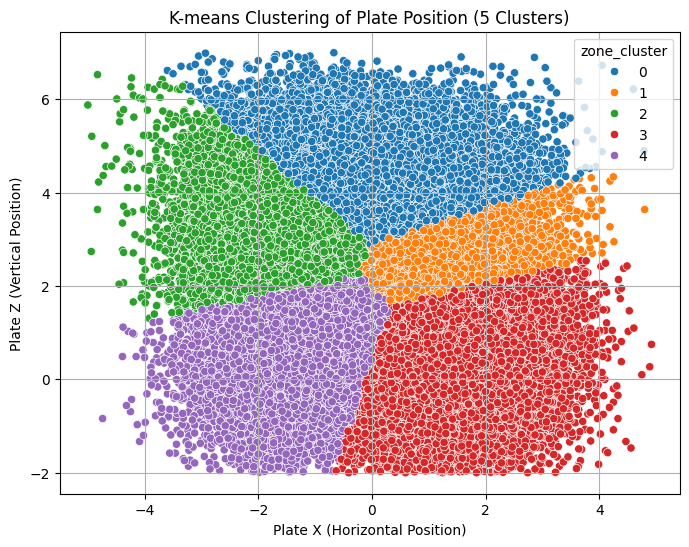

In [23]:
# クラスタリング結果の可視化
plt.figure(figsize=(8, 6))
sns.scatterplot(x='plate_x', y='plate_z', hue='zone_cluster', palette='tab10', data=df_clean, legend='full')
plt.title('K-means Clustering of Plate Position (5 Clusters)')
plt.xlabel('Plate X (Horizontal Position)')
plt.ylabel('Plate Z (Vertical Position)')
plt.grid(True)
plt.show()

/home/2025/gawa/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


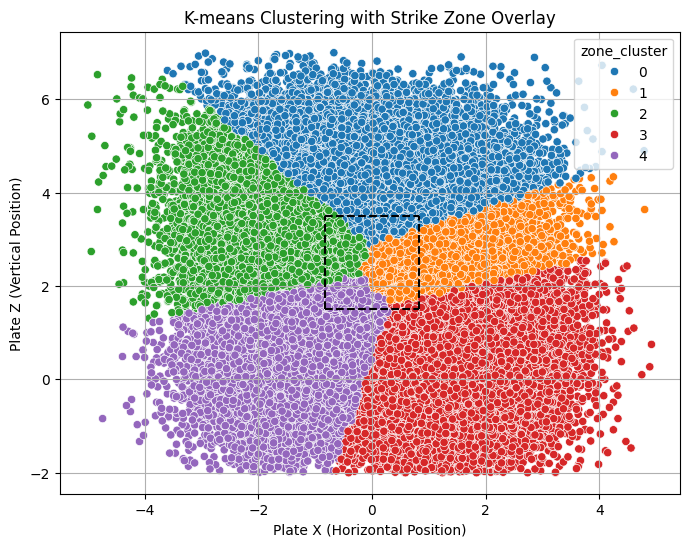

In [24]:
# ストライクゾーンの枠を追加したプロット
plt.figure(figsize=(8, 6))
sns.scatterplot(x='plate_x', y='plate_z', hue='zone_cluster', palette='tab10', data=df_clean, legend='full')

# ストライクゾーンの枠を描画
plt.plot([-0.83, -0.83], [1.5, 3.5], color='black', linestyle='--')  # 左端
plt.plot([0.83, 0.83], [1.5, 3.5], color='black', linestyle='--')    # 右端
plt.plot([-0.83, 0.83], [1.5, 1.5], color='black', linestyle='--')   # 下端
plt.plot([-0.83, 0.83], [3.5, 3.5], color='black', linestyle='--')   # 上端

# ラベルの設定
plt.title('K-means Clustering with Strike Zone Overlay')
plt.xlabel('Plate X (Horizontal Position)')
plt.ylabel('Plate Z (Vertical Position)')
plt.grid(True)
plt.show()


In [25]:
# ストライクとボールの判定を行う
# ストライクゾーン内 (plate_xが-0.71 ~ 0.71 かつ plate_zが1.5 ~ 3.5) をストライクとみなす
df_clean['strike'] = ((df_clean['plate_x'].between(-0.71, 0.71)) & (df_clean['plate_z'].between(1.5, 3.5))).astype(int)

# 各クラスタごとのストライク率の集計
zone_summary = df_clean.groupby('zone_cluster')['strike'].agg(['count', 'sum'])
zone_summary['ball'] = zone_summary['count'] - zone_summary['sum']
zone_summary['strike_rate'] = zone_summary['sum'] / zone_summary['count']
zone_summary['ball_rate'] = zone_summary['ball'] / zone_summary['count']

/tmp/ipykernel_1879378/4241680836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['strike'] = ((df_clean['plate_x'].between(-0.71, 0.71)) & (df_clean['plate_z'].between(1.5, 3.5))).astype(int)


In [26]:
print(zone_summary)

               count     sum    ball  strike_rate  ball_rate
zone_cluster                                                
0             493496  195215  298281     0.395576   0.604424
1             937099  608655  328444     0.649510   0.350490
2             696573  322443  374130     0.462899   0.537101
3             471856   24840  447016     0.052643   0.947357
4             670510  279355  391155     0.416631   0.583369


In [27]:
df_clean

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,original_index,pitch_cluster_label,cluster,zone_cluster,strike
0,0,FF,2020-07-23,95.3,-3.28,5.47,"Scherzer, Max",543305,453286,NaN,...,2.0,1.26,0.86,-0.86,24.9,17,FF/SI,2,2,0
1,1,FF,2020-07-23,96.1,-3.38,5.33,"Scherzer, Max",543305,453286,NaN,...,2.0,1.02,0.79,-0.79,21.8,18,FF/SI,2,2,0
2,2,FF,2020-07-23,96.7,-3.21,5.33,"Scherzer, Max",543305,453286,NaN,...,2.0,1.17,0.78,-0.78,23.6,19,FF/SI,1,1,1
3,3,CU,2020-07-23,79.7,-3.36,5.48,"Scherzer, Max",543305,453286,NaN,...,2.0,4.41,-0.95,0.95,26.7,20,CU,4,4,1
4,4,FF,2020-07-23,96.1,-3.28,5.13,"Scherzer, Max",543305,453286,field_out,...,2.0,1.22,0.75,-0.75,18.1,21,FF/SI,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345234,3345234,KC,2024-10-30,77.4,-1.23,5.78,"Buehler, Walker",669224,621111,strikeout,...,NaN,5.20,-1.08,1.08,50.0,3345218,CU,4,4,1
3345235,3345235,KC,2024-10-30,78.5,-1.19,5.70,"Buehler, Walker",657077,621111,NaN,...,NaN,5.16,-1.05,1.05,51.9,3345219,CU,4,4,0
3345236,3345236,FC,2024-10-30,93.1,-1.19,5.53,"Buehler, Walker",657077,621111,NaN,...,NaN,1.89,-0.53,0.53,44.8,3345220,FF/FC,1,1,0
3345237,3345237,KC,2024-10-30,78.7,-1.01,5.73,"Buehler, Walker",657077,621111,NaN,...,NaN,5.28,-1.05,1.05,54.2,3345221,CU,3,3,0


In [28]:
# game_date, pitcher, original_indexでソート
df_sorted = df_clean.sort_values(by=['game_date', 'pitcher', 'original_index'])

# ソート後のデータ確認
df_sorted.head(10)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,original_index,pitch_cluster_label,cluster,zone_cluster,strike
0,0,FF,2020-07-23,95.3,-3.28,5.47,"Scherzer, Max",543305,453286,NaN,...,2.0,1.26,0.86,-0.86,24.9,17,FF/SI,2,2,0
1,1,FF,2020-07-23,96.1,-3.38,5.33,"Scherzer, Max",543305,453286,NaN,...,2.0,1.02,0.79,-0.79,21.8,18,FF/SI,2,2,0
2,2,FF,2020-07-23,96.7,-3.21,5.33,"Scherzer, Max",543305,453286,NaN,...,2.0,1.17,0.78,-0.78,23.6,19,FF/SI,1,1,1
3,3,CU,2020-07-23,79.7,-3.36,5.48,"Scherzer, Max",543305,453286,NaN,...,2.0,4.41,-0.95,0.95,26.7,20,CU,4,4,1
4,4,FF,2020-07-23,96.1,-3.28,5.13,"Scherzer, Max",543305,453286,field_out,...,2.0,1.22,0.75,-0.75,18.1,21,FF/SI,2,2,1
5,5,FF,2020-07-23,96.6,-3.17,5.56,"Scherzer, Max",592450,453286,NaN,...,2.0,1.04,0.84,0.84,28.9,22,FF/SI,4,4,1
6,6,SL,2020-07-23,86.7,-3.47,5.37,"Scherzer, Max",592450,453286,NaN,...,2.0,3.08,-0.22,-0.22,22.6,23,SL,2,2,1
7,7,FF,2020-07-23,96.7,-3.26,5.44,"Scherzer, Max",592450,453286,single,...,2.0,1.08,0.92,0.92,27.6,24,FF/SI,2,2,1
8,8,SL,2020-07-23,87.4,-3.39,5.33,"Scherzer, Max",650402,453286,NaN,...,2.0,2.69,-0.27,-0.27,24.1,25,SL,1,1,1
9,9,FF,2020-07-23,95.2,-3.24,5.52,"Scherzer, Max",650402,453286,NaN,...,2.0,1.24,0.58,0.58,26.6,26,FF/SI,0,0,0


In [29]:
output_path = 'df_clean_zone_cluster.csv'
df_clean.to_csv(output_path, index=False)
